<a href="https://colab.research.google.com/github/Luensmann/Bachelorarbeit/blob/main/Evaluation/Eval_yepes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import AutoTokenizer, BertForTokenClassification, AutoModelForTokenClassification
from datasets import load_dataset

In [ ]:
# labels

labels = ['O', 'B-Gene_protein', 'I-Gene_protein', 'B-DNA_Mutation', 'I-DNA_Mutation', 'B-DNA_modification', 'I-DNA_modification', 'B-locus', 'I-locus', 'B-Mutation', 'I-Mutation', 'B-dbSNP', 'I-dbSNP', 'B-Protein_Mutation', 'I-Protein_Mutation', 'B-RNA', 'I-RNA', 'B-RNA_Mutation', 'I-RNA_Mutation']

id2label = {
 0: 'O',
 1: 'B-Gene_protein',
 2: 'I-Gene_protein',
 3: 'B-DNA_Mutation',
 4: 'I-DNA_Mutation',
 5: 'B-DNA_modification',
 6: 'I-DNA_modification',
 7: 'B-locus',
 8: 'I-locus',
 9: 'B-Mutation',
 10: 'I-Mutation',
 11: 'B-dbSNP',
 12: 'I-dbSNP',
 13: 'B-Protein_Mutation',
 14: 'I-Protein_Mutation',
 15: 'B-RNA',
 16: 'I-RNA',
 17: 'B-RNA_Mutation',
 18: 'I-RNA_Mutation'}

label2id = {
 'B-DNA_Mutation': 3,
 'B-DNA_modification': 5,
 'B-Gene_protein': 1,
 'B-Mutation': 9,
 'B-Protein_Mutation': 13,
 'B-RNA': 15,
 'B-RNA_Mutation': 17,
 'B-dbSNP': 11,
 'B-locus': 7,
 'I-DNA_Mutation': 4,
 'I-DNA_modification': 6,
 'I-Gene_protein': 2,
 'I-Mutation': 10,
 'I-Protein_Mutation': 14,
 'I-RNA': 16,
 'I-RNA_Mutation': 18,
 'I-dbSNP': 12,
 'I-locus': 8,
 'O': 0}

In [ ]:
dataset = load_dataset("Brizape/amia_tokenized_split_0404_dev")
dataset

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/229 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/913 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/420 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/pc/.cache/huggingface/datasets/Brizape___parquet/Brizape--amia_tokenized_split_0404_dev-5c88a251eef9689d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 229
    })
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 913
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 420
    })
})

In [ ]:
# get all texts for predictions
texts = []
for item in dataset["test"]:
    texts.append(item["texts"])
print(len(texts))

# get all gold labels aka true labels
gold_id_all = []
for item in dataset["test"]:
    gold_id_all.append(item["labels"][1:-1])
print(len(gold_id_all))

# convert all IDs into labels
gold_label_all = []
for item in gold_id_all:
    gold_label_all.append([id2label[i] for i in item])
print(len(gold_label_all))

420
420
420


In [ ]:
saveName = "5e-05_0404_ES6_strict_tok"
model = "Brizape/Yepes_" + saveName
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForTokenClassification.from_pretrained(model)

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/706k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
# gold_id_all - expected outputs in ids-format
# gold_label_all - expected outputs in label-format
# pred_label_all - all predicted labels in label-format
# pred_id_all - all predicted labels in id-format

# del all missmatches in both list:
# gold_id - expected outputs in ids-format
# gold_label - expected outputs in label-format
# pred_label - all predicted labels in label-format
# pred_id - all predicted labels in id-format

# gold_label_norm - normalisation; removed prefix
# pred_label_norm - normalisation; removed prefix

# y_true - for sklearn, no sublists
# y-pred - for sklearn, no sublists

In [ ]:
def predict(text):
    
    inputs = tokenizer(text, add_special_tokens=False, return_tensors="pt", truncation=True, max_length=512)
    if inputs['input_ids'].numel() == 0:
        print("input_ids is empty")
        return []
    
    with torch.no_grad():
        logits = model(**inputs).logits 
    predictions = torch.argmax(logits, dim=2)
    
    predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]

    return predicted_token_class

In [ ]:
# predict all text
pred_label_all = []
for index, text in enumerate(texts):
    print(index, end=' ')
    pred_label_all.append(predict(text))
len(pred_label_all)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 input_ids is empty
17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 input_ids is empty
42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 input_ids is empty
62 63 64 65 66 input_ids is empty
67 68 69 70 71 72 73 74 75 76 77 78 79 80 input_ids is empty
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 input_ids is empty
104 105 106 107 108 input_ids is empty
109 110 111 input_ids is empty
112 113 114 115 116 input_ids is empty
117 118 119 120 input_ids is empty
121 122 123 input_ids is empty
124 125 126 127 input_ids is empty
128 129 130 input_ids is empty
131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 input_ids is empty
160 161 162 163 164 input_ids is empty
165 166 167 input_ids is empty
168 169 170 171 input_ids is empty
172 173 174 175 176 input_ids is empty
177 178 179 180 181 182 input_ids is empty
183 184 185 186 1

420

In [ ]:
for i, pred in enumerate(pred_label_all):
    if len(pred) == 512:
        pred_label_all[i] = pred[1:-1]

In [ ]:
# convert all IDs into label
pred_id_all = []
for item in pred_label_all:
    pred_id_all.append([label2id[i] for i in item])
len(pred_id_all)

420

In [ ]:
# checking if all gold and pred are same len
# reutrn list with indices of all missmatches
def check_len(gold, pred):
    missmatch_index = []
    for index, (gold, pred) in enumerate(zip(gold, pred)):
        if len(gold)==len(pred):
            #print("yes")
            continue
        else:
            missmatch_index.append(index)
    print("indices to del:" + str(missmatch_index))
    return missmatch_index

In [ ]:
# delete all missmatches from both sets
def del_missmatches(list1, list2, indices_to_del):
    for index in sorted(indices_to_del, reverse=True):
            del list1[index]
            del list2[index]

In [ ]:
dele = [170]
for index in dele:
    print("#"*(30), index, len(gold_id_all[index]), len(pred_id_all[index][1:-1]), "#"*(30))
    for gold, pred in zip(gold_id_all[index], pred_id_all[index]):
        #if gold != pred:
        print(gold, pred)

############################## 170 510 509 ##############################
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 

In [ ]:
# copy _all files
gold_id = gold_id_all[:]
gold_label = gold_label_all[:]
pred_id = pred_id_all[:]
pred_label = pred_label_all[:]
all = [gold_id, gold_label, pred_id, pred_label]
print('len befor:')
for list in all:
    print(len(list))
# get indicies with missmatch
# and delete them from both sets
indices_to_del = check_len(gold_id, pred_id)
del_missmatches(gold_id , pred_id, indices_to_del)
del_missmatches(gold_label , pred_label, indices_to_del)
print('len after:')
for list in all:
    print(len(list))
    


len befor:
420
420
420
420
indices to del:[170]
len after:
419
419
419
419


In [ ]:
############################################################
######################### seqeval ##########################
############################################################

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.scheme import IOB2

In [ ]:
# generate metrics
print("\n")
print("-"*60 + "\n" + "    SeqEval strict\n" + "-"*60)
print("strict: \n" + classification_report(gold_label, pred_label, scheme=IOB2, mode='strict'))

print("\n")
print("-"*60 + "\n" + "    SeqEval default\n" + "-"*60)
print("default: \n" + classification_report(gold_label, pred_label))



------------------------------------------------------------
    SeqEval strict
------------------------------------------------------------
strict: 
                  precision    recall  f1-score   support

    DNA_Mutation       0.66      0.43      0.52       267
    Gene_protein       0.59      0.49      0.54       231
        Mutation       0.00      0.00      0.00         2
Protein_Mutation       1.00      0.09      0.16        23
             RNA       0.00      0.00      0.00         1
    RNA_Mutation       0.00      0.00      0.00         2
           dbSNP       0.00      0.00      0.00         3
           locus       0.47      0.21      0.29        75

       micro avg       0.61      0.41      0.49       604
       macro avg       0.34      0.15      0.19       604
    weighted avg       0.61      0.41      0.48       604



------------------------------------------------------------
    SeqEval default
------------------------------------------------------------


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


default: 
                  precision    recall  f1-score   support

    DNA_Mutation       0.65      0.43      0.52       267
    Gene_protein       0.56      0.49      0.53       231
        Mutation       0.00      0.00      0.00         2
Protein_Mutation       0.23      0.13      0.17        23
             RNA       0.00      0.00      0.00         1
    RNA_Mutation       0.00      0.00      0.00         2
           dbSNP       0.00      0.00      0.00         3
           locus       0.31      0.27      0.29        75

       micro avg       0.55      0.42      0.48       604
       macro avg       0.22      0.17      0.19       604
    weighted avg       0.55      0.42      0.47       604



In [ ]:
# save reports as csv
import pandas as pd
report = pd.DataFrame(classification_report(gold_label, pred_label, mode='strict', digits=2, output_dict=True)).transpose()
print(report)
df = pd.DataFrame(report)#.transpose()
# With a Sheet Name
file_name = "yepes" + saveName
report.to_excel('yepes\ ' + saveName + '.xlsx', index=True)

                  precision    recall  f1-score  support
DNA_Mutation       0.658960  0.426966  0.518182    267.0
Gene_protein       0.590674  0.493506  0.537736    231.0
Mutation           0.000000  0.000000  0.000000      2.0
Protein_Mutation   1.000000  0.086957  0.160000     23.0
RNA                0.000000  0.000000  0.000000      1.0
RNA_Mutation       0.000000  0.000000  0.000000      2.0
dbSNP              0.000000  0.000000  0.000000      3.0
locus              0.470588  0.213333  0.293578     75.0
micro avg          0.611940  0.407285  0.489066    604.0
macro avg          0.340028  0.152595  0.188687    604.0
weighted avg       0.613712  0.407285  0.477268    604.0


In [ ]:
#######################################################
####################### sklearn #######################
#######################################################

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
import evaluate

In [ ]:
y_pred = []
for sublist in pred_id:
    for label in sublist:
        y_pred.append(label)
len(y_pred)

35460

In [ ]:
y_true = []
for sublist in gold_id:
    for label in sublist:
        y_true.append(label)
len(y_true)

35460

In [ ]:
print(unique_labels(y_pred))
print(unique_labels(y_true))

[ 0  1  2  3  4  7  8 12 13 14]
[ 0  1  2  3  4  7  8  9 11 12 13 14 15 16 17]


In [ ]:
confusion_matrix(y_true, y_pred, labels= [i for i in range(19)])

array([[34202,    43,    19,    28,     1,     0,     0,     9,    27,
            0,     0,     0,     0,     0,     5,     0,     0,     0,
            0],
       [   96,   123,    10,     1,     0,     0,     0,     1,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   78,     4,    90,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  116,    10,     3,   125,    10,     0,     0,     1,     0,
            0,     0,     0,     0,     0,     2,     0,     0,     0,
            0],
       [   63,     2,     1,     6,    40,     0,     0,     2,     6,
            0,     0,     0,     0,     0,     3,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,   

In [ ]:
def plot(freal, predicted_token_class, label_list):
    label_names = labels #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=[i for i in range(19)]), columns=columns, index=index)
    return table

In [ ]:
plot = plot(y_true, y_pred, labels)
print(plot)
df = pd.DataFrame(plot)#.transpose()
df.to_excel('yepes\ ' + saveName + 'confusion_.xlsx', index=True)

                        O  B-Gene_protein  I-Gene_protein  B-DNA_Mutation  \
O                   34202              43              19              28   
B-Gene_protein         96             123              10               1   
I-Gene_protein         78               4              90               1   
B-DNA_Mutation        116              10               3             125   
I-DNA_Mutation         63               2               1               6   
B-DNA_modification      0               0               0               0   
I-DNA_modification      0               0               0               0   
B-locus                38               4               2               3   
I-locus               118               2               6               4   
B-Mutation              1               0               0               1   
I-Mutation              0               0               0               0   
B-dbSNP                 1               0               0               0   

In [ ]:
def plot_heat(freal, predicted_token_class, label_list):
    label_names = label_list #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels= [i for i in range(19)]), columns=columns, index=index)
    sns.set (rc = {'figure.figsize':(15, 12)})
    return sns.heatmap(table, annot=True, fmt='d', linewidth=.1, vmax=125, cmap='YlOrBr')

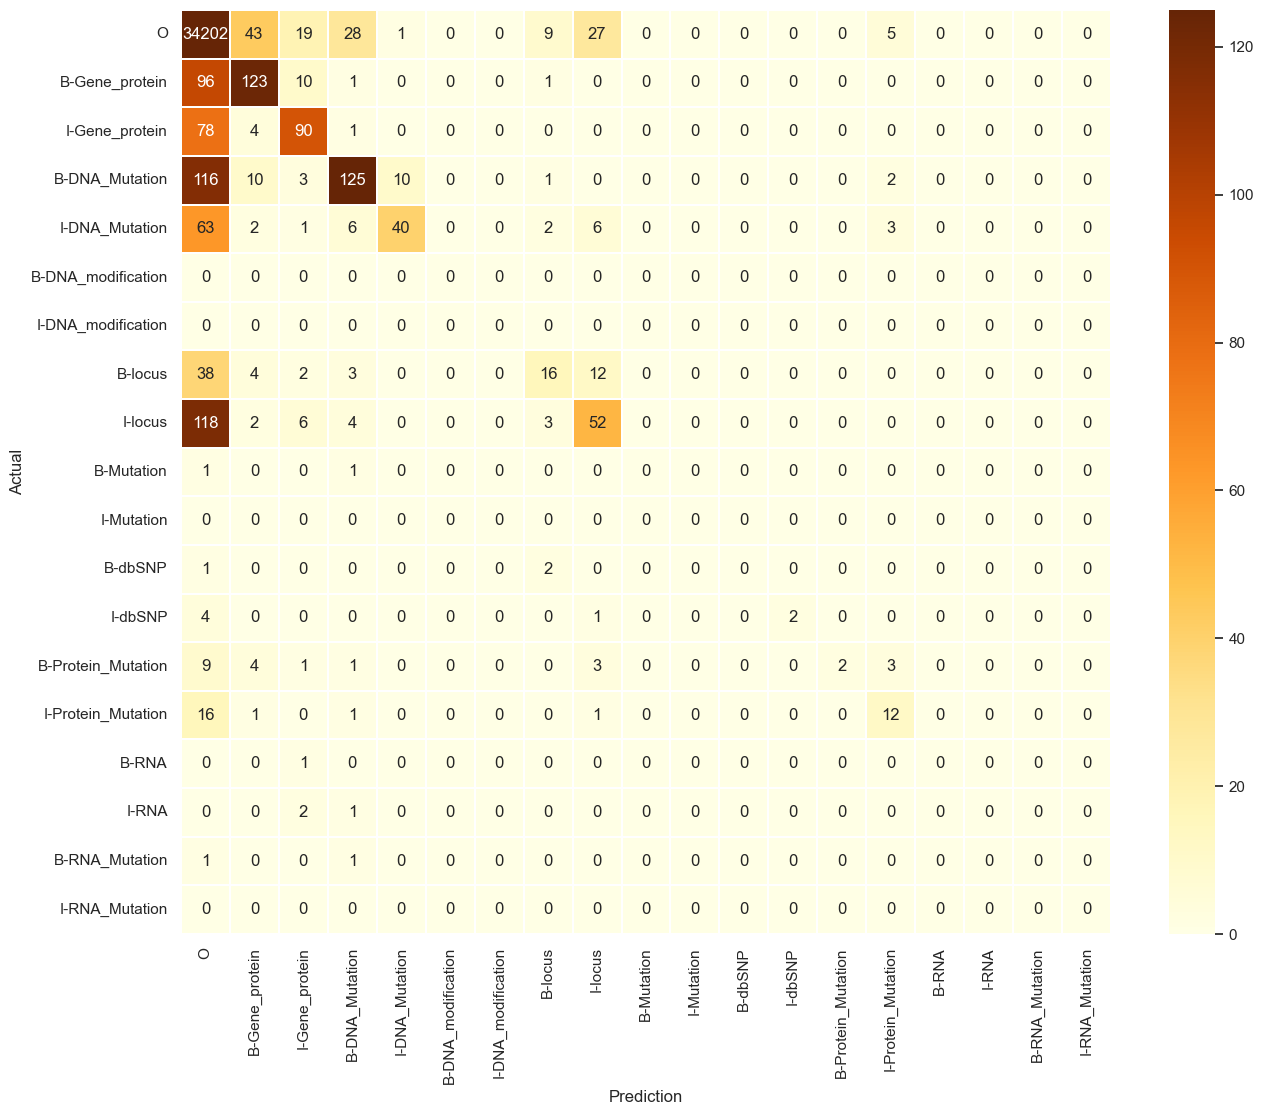

In [ ]:
ax = plot_heat(y_true, y_pred, labels)
ax.set(xlabel="Prediction", ylabel="Actual")
ax.figure.savefig("output.png")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
exl = pd.DataFrame()


report = classification_report(y_true, y_pred, labels=[i for i in range(19)], target_names = labels, output_dict=True)
print(report)
df = pd.DataFrame(report).transpose()
print("\n")
print("-"*60 + "\n" + "    Label Report\n" + "-"*60)
print(df)
exl = exl.append(df, ignore_index=True)
exl.to_excel('yepes\ ' + saveName + '_labelReport.xlsx', index=True)#.transpose()

{'O': {'precision': 0.9844285179748439, 'recall': 0.9961554144579717, 'f1-score': 0.9902572491567382, 'support': 34334}, 'B-Gene_protein': {'precision': 0.6373056994818653, 'recall': 0.5324675324675324, 'f1-score': 0.5801886792452831, 'support': 231}, 'I-Gene_protein': {'precision': 0.6666666666666666, 'recall': 0.5202312138728323, 'f1-score': 0.5844155844155844, 'support': 173}, 'B-DNA_Mutation': {'precision': 0.7225433526011561, 'recall': 0.4681647940074906, 'f1-score': 0.5681818181818182, 'support': 267}, 'I-DNA_Mutation': {'precision': 0.7843137254901961, 'recall': 0.3252032520325203, 'f1-score': 0.45977011494252873, 'support': 123}, 'B-DNA_modification': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'I-DNA_modification': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'B-locus': {'precision': 0.47058823529411764, 'recall': 0.21333333333333335, 'f1-score': 0.29357798165137616, 'support': 75}, 'I-locus': {'precision': 0.5098039215686274, 'recall

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [ ]:
i = 0
for (pred, gold, inIDs) in zip(pred_label, gold_label, dataset['test']['input_ids']):
    print(i, len(pred), len(inIDs[1:-1]), end="\n")
    i = i+1
    for i, (label1, label2, inID) in enumerate(zip(pred, gold, inIDs[1:-1])):
        print(i, tokenizer.decode(inID), ":(" + str(label1), ",", label2 + ')')
        if label1 != label2:
            print("#########################")
            #print(":(" + str(label1), ",", label2, end=')\n')
    print(" ")